In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


#read the data in
train= pd.read_csv("Wine_Training.csv")
test=pd.read_csv("Wine_Testing.csv")

#training dataset
train.head()

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [2]:
#testing dataset
test.head()

,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL
0,7.7,0.26,0.26,2.0,0.052,19,77.0,0.99510,3.15,0.79,10.9
1,7.9,0.58,0.23,2.3,0.076,23,94.0,0.99686,3.21,0.58,9.5
2,7.7,0.57,0.21,1.5,0.069,4,9.0,0.99458,3.16,0.54,9.8
3,7.9,0.34,0.36,1.9,0.065,5,10.0,0.99419,3.27,0.54,11.2
4,8.6,0.42,0.39,1.8,0.068,6,12.0,0.99516,3.35,0.69,11.7


In [3]:
#DATA VISUALIZATION


def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))

# Describe the train data
describe_data(train)

Data Types:
FIXED_ACIDITY           float64
VOLATILE_ACIDITY        float64
CITRIC_ACID             float64
RESIDUAL_SUGAR          float64
CHLORIDES               float64
FREE_SULFUR_DIOXIDE     float64
TOTAL_SULFUR_DIOXIDE      int64
DENSITY                 float64
PH                      float64
SULPHATES               float64
ALCOHOL                 float64
QUALITY                   int64
dtype: object
Rows and Columns:
(1198, 12)
Column Names:
Index(['FIXED_ACIDITY', 'VOLATILE_ACIDITY', 'CITRIC_ACID', 'RESIDUAL_SUGAR',
       'CHLORIDES', 'FREE_SULFUR_DIOXIDE', 'TOTAL_SULFUR_DIOXIDE', 'DENSITY',
       'PH', 'SULPHATES', 'ALCOHOL', 'QUALITY'],
      dtype='object')
Null Values:
FIXED_ACIDITY           0.0
VOLATILE_ACIDITY        0.0
CITRIC_ACID             0.0
RESIDUAL_SUGAR          0.0
CHLORIDES               0.0
FREE_SULFUR_DIOXIDE     0.0
TOTAL_SULFUR_DIOXIDE    0.0
DENSITY                 0.0
PH                      0.0
SULPHATES               0.0
ALCOHOL                 0.0


No handles with labels found to put in legend.


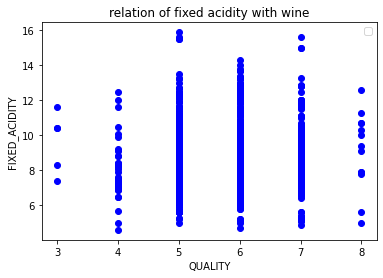

No handles with labels found to put in legend.


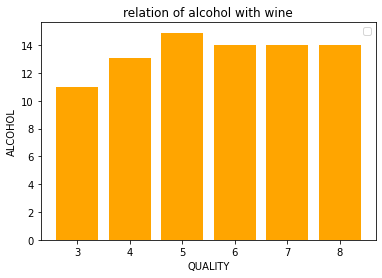

In [4]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(train['QUALITY'], train['FIXED_ACIDITY'], color = 'blue')
plt.title('relation of fixed acidity with wine')
plt.xlabel('QUALITY')
plt.ylabel('FIXED_ACIDITY')
plt.legend()
plt.show()

# checking the variation of fixed acidity in the different qualities of wine

plt.bar(train['QUALITY'], train['ALCOHOL'], color = 'orange')
plt.title('relation of alcohol with wine')
plt.xlabel('QUALITY')
plt.ylabel('ALCOHOL')
plt.legend()
plt.show()

<AxesSubplot:xlabel='QUALITY', ylabel='SULPHATES'>

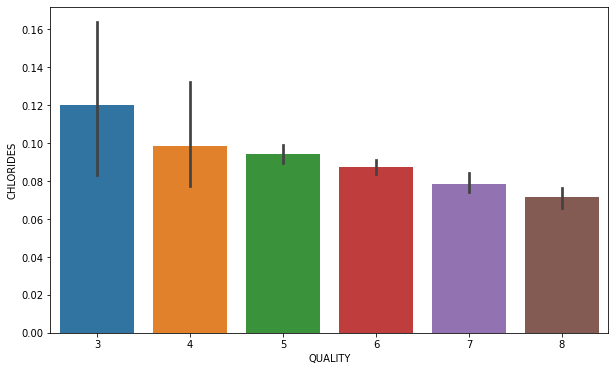

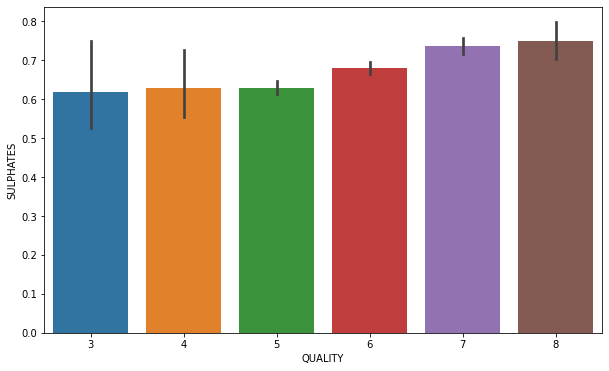

In [5]:
import seaborn as sns

#Composition of chloride go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'QUALITY', y = 'CHLORIDES', data = train)


#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'QUALITY', y = 'SULPHATES', data = train)

<AxesSubplot:>

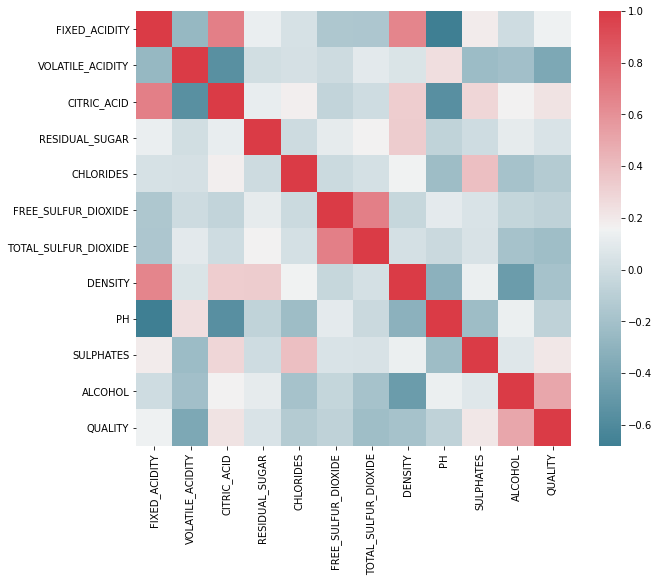

In [6]:
#Create correlation plot - heatmap

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

In [7]:
#DATA PRE-PROCESSING
# Removing Unnecassary columns from the dataset

# dividing the dataset in training and testing set
#correlations = train.corr()['QUALITY'].drop('QUALITY')

#print(correlations)

#def get_features(correlation_threshold):
 #   max_corrs = correlations.abs()
  #  high_correaltions = max_corrs
   # high_correaltions =  max_corrs[max_corrs > correlation_threshold].index.values.tolist()

    #return high_correaltions


#features = get_features(0.04)
#print(features)
#x = train[features]
#y = train['QUALITY'] 

In [8]:
from sklearn.model_selection import train_test_split

x=train.drop('QUALITY', axis=1)
y=train['QUALITY']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

(958, 11)
(958,)
(240, 11)
(240,)


In [9]:
#Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)


print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.46555323590814196
Testing accuracy : 0.475
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.63      0.33      0.43       104
           6       0.46      0.64      0.54        97
           7       0.37      0.69      0.48        26
           8       0.00      0.00      0.00         4

    accuracy                           0.48       240
   macro avg       0.24      0.28      0.24       240
weighted avg       0.50      0.47      0.46       240

[[ 0  0  0  0  1  0]
 [ 0  0  4  4  0  0]
 [ 0  0 34 61  8  1]
 [ 0  0 15 62 18  2]
 [ 0  0  1  7 18  0]
 [ 0  0  0  0  4  0]]


In [10]:
#Support Vector Machine
from sklearn.svm import SVC


model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.6889352818371608
Testing accuracy : 0.6541666666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.66      0.80      0.72       104
           6       0.64      0.60      0.62        97
           7       0.64      0.62      0.63        26
           8       0.00      0.00      0.00         4

    accuracy                           0.65       240
   macro avg       0.32      0.34      0.33       240
weighted avg       0.62      0.65      0.63       240

[[ 0  0  0  1  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 83 20  1  0]
 [ 0  0 31 58  8  0]
 [ 0  0  3  7 16  0]
 [ 0  0  0  4  0  0]]


In [11]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


# creating the model
model = RandomForestClassifier(n_estimators = 300)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 0.6791666666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.70      0.78      0.74       104
           6       0.66      0.69      0.68        97
           7       0.68      0.58      0.62        26
           8       0.00      0.00      0.00         4

    accuracy                           0.68       240
   macro avg       0.34      0.34      0.34       240
weighted avg       0.64      0.68      0.66       240

[[ 0  1  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 81 22  1  0]
 [ 0  0 25 67  5  0]
 [ 0  0  2  9 15  0]
 [ 0  0  0  3  1  0]]


In [12]:
#Now lets try to do some evaluation for random forest model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.6973355263157894

In [13]:
test= sc.fit_transform(test)

test_predictions=model.predict(test)
print(test_predictions)



df = pd.read_csv("Wine_Testing.csv")
df["QUALITY"] = test_predictions
df.to_csv("Results.csv", index=False)

k=pd.read_csv("Results.csv")
k.head(20)

[7 5 5 6 7 5 6 6 6 5 6 6 6 5 6 6 6 6 5 7 6 7 7 7 5 7 6 5 5 6 7 5 7 5 5 6 6
 7 6 6 5 6 5 5 7 5 5 6 5 6 6 6 6 5 5 5 6 6 5 6 6 6 5 6 5 5 7 6 6 6 5 7 6 6
 6 5 6 5 7 5 5 6 6 6 6 5 6 6 7 6 5 5 6 6 7 5 6 5 5 6 6 5 7 6 7 6 5 5 5 5 5
 5 5 6 5 5 5 5 6 6 5 5 5 6 7 7 6 6 6 6 5 5 5 5 5 5 5 6 5 5 5 6 6 6 5 6 5 5
 6 5 5 6 5 6 5 5 5 6 6 6 5 6 6 5 6 5 6 5 5 5 5 6 5 7 5 5 5 5 5 6 5 6 6 5 5
 5 5 5 5 5 6 5 6 6 5 5 5 5 5 5 5 6 5 5 7 6 6 7 7 6 7 6 6 6 7 5 6 6 6 7 5 5
 5 5 6 6 6 6 7 6 6 7 6 5 7 6 5 5 5 5 5 5 7 5 6 6 5 5 6 6 6 7 7 6 6 5 6 5 5
 5 6 7 6 5 6 6 5 5 5 5 5 5 5 6 7 6 5 7 5 7 5 6 5 6 5 6 5 5 6 5 6 6 7 6 6 5
 6 6 5 6 5 6 5 5 5 6 6 5 6 6 6 7 6 6 5 6 5 5 6 6 6 5 6 5 6 6 6 6 5 6 6 5 6
 5 6 5 6 6 5 5 6 6 6 7 6 6 7 6 6 6 5 7 5 5 6 6 6 6 5 6 5 5 5 5 5 5 5 6 6 5
 6 6 7 6 5 6 5 7 7 6 6 6 7 6 6 5 7 6 7 6 6 5 6 6 6 6 5 6 6 5 6]


,FIXED_ACIDITY,VOLATILE_ACIDITY,CITRIC_ACID,RESIDUAL_SUGAR,CHLORIDES,FREE_SULFUR_DIOXIDE,TOTAL_SULFUR_DIOXIDE,DENSITY,PH,SULPHATES,ALCOHOL,QUALITY
0,7.7,0.26,0.26,2.0,0.052,19,77.0,0.99510,3.15,0.79,10.9,7
1,7.9,0.58,0.23,2.3,0.076,23,94.0,0.99686,3.21,0.58,9.5,5
2,7.7,0.57,0.21,1.5,0.069,4,9.0,0.99458,3.16,0.54,9.8,5
3,7.9,0.34,0.36,1.9,0.065,5,10.0,0.99419,3.27,0.54,11.2,6
4,8.6,0.42,0.39,1.8,0.068,6,12.0,0.99516,3.35,0.69,11.7,7
5,9.9,0.74,0.19,5.8,0.111,33,76.0,0.99878,3.14,0.55,9.4,5
6,7.2,0.36,0.46,2.1,0.074,24,44.0,0.99534,3.40,0.85,11.0,6
7,7.2,0.36,0.46,2.1,0.074,24,44.0,0.99534,3.40,0.85,11.0,6
8,7.2,0.36,0.46,2.1,0.074,24,44.0,0.99534,3.40,0.85,11.0,6
9,9.9,0.72,0.55,1.7,0.136,24,52.0,0.99752,3.35,0.94,10.0,5
